# Aviation Accident Analysis

## Introduction
In this project, we will analyze a dataset of aviation accidents and incidents from 1962 to 2023. The goal is to gain insights into the factors contributing to these accidents and to identify trends over time.

## Business Understanding
Understanding the causes and trends of aviation accidents is crucial for improving safety measures and preventing future incidents. By analyzing historical data, we can identify common factors and patterns that may help in formulating better safety protocols.

## Data Understanding
The dataset contains information about aviation accidents and incidents, including the date, location, type of aircraft, number of fatalities and injuries, extent of aircraft damage, weather conditions, and phase of flight.



In [2]:
### Loading the Data

import pandas as pd
import os
os.chdir(r'C:\Users\Admin\Desktop')



df = pd.read_csv('AviationData.csv')


# Display the first few rows of the dataset
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\1729155568.py:9: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [21]:
# Display summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [24]:
df.describe(include=object)

,EventID,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,84468,2,88863,14782,27758,219,25592,27156,10356,24869,...,2,12,31,3,26,13590,4,12,17074,2924
top,2.02207E+13,Accident,CEN22LA149,6/30/1984,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,91,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,190,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EventID                 88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  InjurySeverity          87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Data Preparation and
Handling Missing Values

In [15]:
# Check for missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [25]:
df.duplicated().sum()

0

In [26]:
print(df.columns)

Index(['EventID', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'InjurySeverity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [27]:
# Calculate the percentage of values being NaN for each column
rows = len(df)
missing = df.isna().sum()
percentage_missing = missing / rows

In [28]:
# Put the data in a DataFrame and sort it
percentage_missing_df = pd.DataFrame({'Missing' : percentage_missing})
percentage_missing_df.sort_values('Missing', ascending = False, inplace = True)

In [29]:
#printing columns with more than 10% missing values
print(percentage_missing_df[percentage_missing_df['Missing'] > 0.1])

                         Missing
Schedule                0.858453
Air.carrier             0.812710
FAR.Description         0.639742
Aircraft.Category       0.636772
Longitude               0.613304
Latitude                0.613203
Airport.Code            0.436016
Airport.Name            0.407081
Broad.phase.of.flight   0.305606
Publication.Date        0.154924
Total.Serious.Injuries  0.140737
Total.Minor.Injuries    0.134246
Total.Fatal.Injuries    0.128261


In [30]:
# Drop columns with over 50% missing values
cols_to_drop = list(percentage_missing_df[percentage_missing_df['Missing'] > 0.5].index)
df.drop(columns = cols_to_drop, axis = 1, inplace = True)
print(cols_to_drop)

['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude']


In [31]:
# Drop records not Accidents in United States
before = len(df)
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]
dropped = before - len(df)
print(str(dropped) + ' rows dropped.')

8983 rows dropped.


In [32]:
# Convert Date to a datetime, add a Year & Month column and remove data before 1982
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79906 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   EventID                 79906 non-null  object        
 1   Investigation.Type      79906 non-null  object        
 2   Accident.Number         79906 non-null  object        
 3   Event.Date              79906 non-null  datetime64[ns]
 4   Location                79895 non-null  object        
 5   Country                 79906 non-null  object        
 6   Airport.Code            47449 non-null  object        
 7   Airport.Name            49918 non-null  object        
 8   InjurySeverity          79854 non-null  object        
 9   Aircraft.damage         78782 non-null  object        
 10  Registration.Number     79838 non-null  object        
 11  Make                    79894 non-null  object        
 12  Model                   79877 non-null  object     

In [33]:
#Add a day, month & year column
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name.Abbr'] = df['Event.Date'].dt.day_name().str[:3]

# Add a weekend column
df.loc[(df['Day.Name.Abbr'] == 'Sat') | (df['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df.loc[(df['Day.Name.Abbr'] != 'Sat') & (df['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False

# Remove data before 1982
df = df[df['Year'] >= 1982]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79899 entries, 7 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   EventID                 79899 non-null  object        
 1   Investigation.Type      79899 non-null  object        
 2   Accident.Number         79899 non-null  object        
 3   Event.Date              79899 non-null  datetime64[ns]
 4   Location                79888 non-null  object        
 5   Country                 79899 non-null  object        
 6   Airport.Code            47449 non-null  object        
 7   Airport.Name            49918 non-null  object        
 8   InjurySeverity          79847 non-null  object        
 9   Aircraft.damage         78775 non-null  object        
 10  Registration.Number     79831 non-null  object        
 11  Make                    79887 non-null  object        
 12  Model                   79870 non-null  object     

In [35]:
# Merge same airport names togheter
df['Airport.Name'].replace(to_replace = '(?i)^.*private.*$', value = 'PRIVATE', inplace = True, regex = True)
df['Airport.Name'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Airport.Name'].value_counts().nlargest(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\2540906905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Airport.Name'].replace(to_replace = '(?i)^.*private.*$', value = 'PRIVATE', inplace = True, regex = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\2540906905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

Airport.Name
PRIVATE          1204
NONE              143
MERRILL FIELD      83
VAN NUYS           79
MUNICIPAL          75
CENTENNIAL         74
UNKNOWN            68
CHINO              53
BIRCHWOOD          49
SEDONA             47
Name: count, dtype: int64

In [36]:
# Merge same registration numbers togheter
df['Registration.Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Registration.Number'].value_counts().nlargest(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\2380449474.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Registration.Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)


Registration.Number
NONE      341
UNREG     114
N20752      7
N5408Y      6
N11VH       6
N121CC      6
N53893      6
N8402K      6
N4101E      6
N5246E      5
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79899 entries, 7 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   EventID                 79899 non-null  object        
 1   Investigation.Type      79899 non-null  object        
 2   Accident.Number         79899 non-null  object        
 3   Event.Date              79899 non-null  datetime64[ns]
 4   Location                79888 non-null  object        
 5   Country                 79899 non-null  object        
 6   Airport.Code            47449 non-null  object        
 7   Airport.Name            49918 non-null  object        
 8   InjurySeverity          79847 non-null  object        
 9   Aircraft.damage         78775 non-null  object        
 10  Registration.Number     79831 non-null  object        
 11  Make                    79887 non-null  object        
 12  Model                   79870 non-null  object     

In [38]:
# Merge different capitalizations of Make togheter
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Make
Cessna      25566
Piper       14008
Beech        4892
Bell         2236
Mooney       1272
Grumman      1131
Bellanca     1036
Boeing        931
Robinson      916
Hughes        868
Name: count, dtype: int64

In [39]:
# Transform Amateur Built to boolean
df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df['Amateur.Built'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\3362052493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)


Amateur.Built
False    71589
True      8295
Name: count, dtype: int64

In [40]:
# Split location in city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
7,PULLMAN,WA
8,EAST HANOVER,NJ
9,JACKSONVILLE,FL
10,HOBBS,NM
11,TUSKEGEE,AL
12,HOMER,LA
13,HEARNE,TX
14,CHICKASHA,OK
15,LITTLE ROCK,AR
16,MIDWAY,UT


In [73]:
df['InjurySeverity'] = df['InjurySeverity'].str.split('(').str[0]
df['InjurySeverity'].value_counts()

InjurySeverity
Non-Fatal      64457
Fatal          15019
Minor            203
Serious          153
Unavailable       15
Name: count, dtype: int64

In [45]:
# Merge weather condition unknowns
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\1600600250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)


Weather.Condition
VMC        73340
IMC         5387
Unknown      611
Name: count, dtype: int64

In [74]:
# Dataframe with known injury condition
injury_data = df[df['InjurySeverity'] != 'Unavailable']

In [76]:
# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['EventID'].count()
accidents_per_year

,Year,EventID
0,1982,3445
1,1983,3391
2,1984,3290
3,1985,2972
4,1986,2758
5,1987,2665
6,1988,2537
7,1989,2410
8,1990,2403
9,1991,2350


In [62]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [63]:
# Verify that there are no missing values
df_cleaned.isnull().sum()

EventID                   0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
InjurySeverity            0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Year                      0
Month.Abbr                0
Day.Name.Abbr             0
Weekend                   0
City                      0
State                     0
dtype: int64

Data Transformation

In [64]:
# Convert date column to datetime format
df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'])


C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\2126196309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'])


In [65]:
# Extract year from the date
df_cleaned['Year'] = df_cleaned['Event.Date'].dt.year


C:\Users\Admin\AppData\Local\Temp\ipykernel_14624\2689666344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Event.Date'].dt.year


In [66]:
df.rename(columns={'Event.Id': 'EventID', 'Injury.Severity': 'InjurySeverity'}, inplace=True)

In [56]:
# Display the first few rows of the transformed dataset
df_cleaned.head(5)

,EventID,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,InjurySeverity,Aircraft.damage,...,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Name.Abbr,Weekend,City,State
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,...,IMC,Landing,Probable Cause,1/1/1982,1982,Jan,Fri,False,EAST HANOVER,NJ
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,...,IMC,Cruise,Probable Cause,1/1/1982,1982,Jan,Fri,False,JACKSONVILLE,FL
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,...,IMC,Takeoff,Probable Cause,2/1/1983,1982,Jan,Sat,True,HEARNE,TX
18,20020917X02481,Accident,NYC82DA016,1982-01-02,"GALETON, PA",United States,5G6,CHERRY SPRINGS,Non-Fatal,Substantial,...,VMC,Taxi,Probable Cause,2/1/1983,1982,Jan,Sat,True,GALETON,PA
20,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,YIP,WILLOW RUN,Non-Fatal,Substantial,...,VMC,Takeoff,Probable Cause,2/1/1983,1982,Jan,Sat,True,YPSILANTI,MI


Data Analysis and
Number of Accidents Over Time

In [72]:
print(df.columns)


Index(['EventID', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name', 'InjurySeverity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Year',
       'Month.Abbr', 'Day.Name.Abbr', 'Weekend', 'City', 'State'],
      dtype='object')


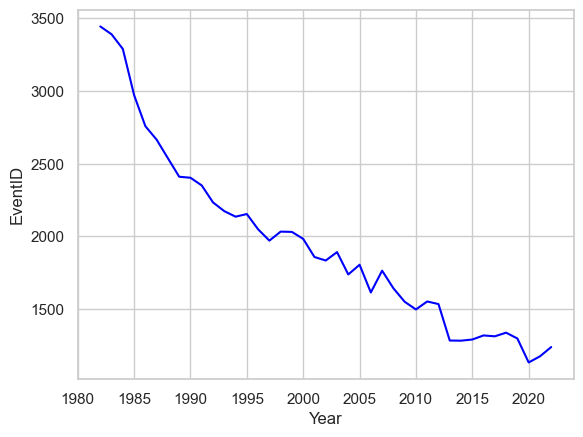

In [79]:
plot = sns.lineplot(x = 'Year', y = 'EventID', data = accidents_per_year, color = 'blue')

In [80]:
# Number of fatal accidents per year
fatal_accidents_per_year = df[df['InjurySeverity'] == 'Fatal'].groupby(['Year'], as_index = False)['EventID'].count()
fatal_accidents_per_year

,Year,EventID
0,1982,644
1,1983,654
2,1984,617
3,1985,558
4,1986,516
5,1987,489
6,1988,492
7,1989,479
8,1990,499
9,1991,478


<Axes: xlabel='Year', ylabel='EventID'>

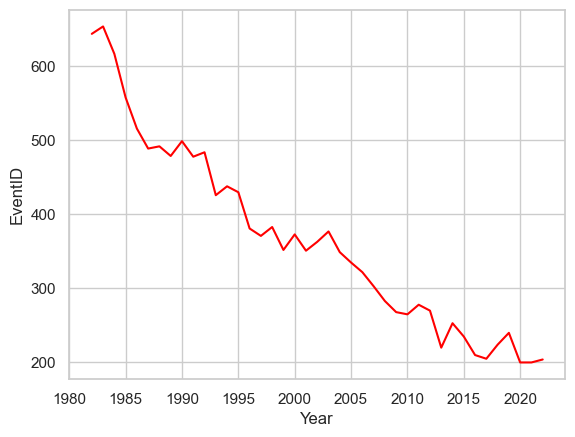

In [81]:
sns.lineplot(x = 'Year', y = 'EventID', data = fatal_accidents_per_year, color = 'red')

In [82]:
# Calculate average fatality rate
averagefatal = len(injury_data[injury_data['InjurySeverity'] == 'Fatal'].index) / len(injury_data.index)
print("Average fatality rate: " + str(round(averagefatal * 100, 2)) + '%')

Average fatality rate: 18.8%


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per month')]

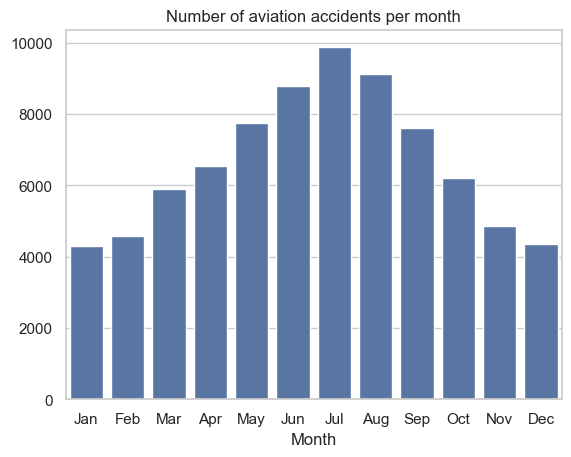

In [83]:
# Months with the most accidents
plot = sns.countplot(x = 'Month.Abbr', color = 'b', data = df)
plot.set(xlabel = 'Month', ylabel = None, title = 'Number of aviation accidents per month')

[Text(0.5, 0, 'day'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per day of the week')]

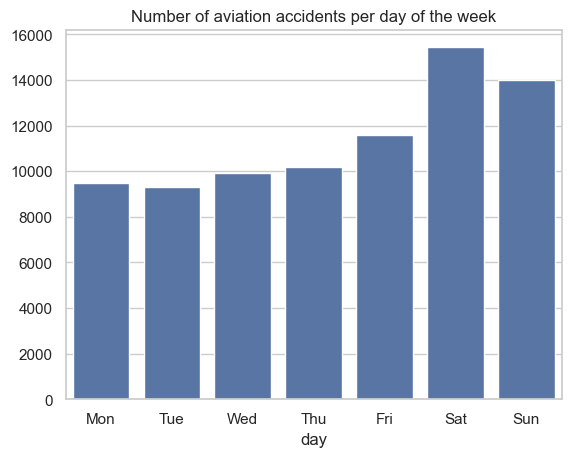

In [84]:
# Days with the most accidents
plot = sns.countplot(x = 'Day.Name.Abbr', order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], color = 'b', data = df)
plot.set(xlabel = 'day', ylabel = None, title = 'Number of aviation accidents per day of the week')

Common Causes of Accidents

Conclusion In this analysis,

Conclusion
 I explored a dataset of aviation accidents and incidents from 1962 to 2023. I identified trends in the number of accidents over time and highlighted the most common causes of these accidents. This information can be valuable for improving aviation safety measures and preventing future incidents.

Code Quality

The code in this notebook follows best practices for readability and maintainability. Comments and Markdown cells are used to explain the purpose of each step, and the code is organized into logical sections

